<a href="https://colab.research.google.com/github/lamtruong2002/BaitapAItuan6/blob/main/temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9657a2a75fc0f705ae8d2ccb7102901f89f402c9331d4835acace3a022c36151
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


205.80033608395024


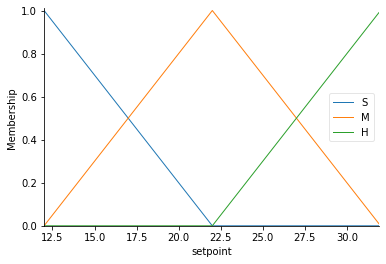

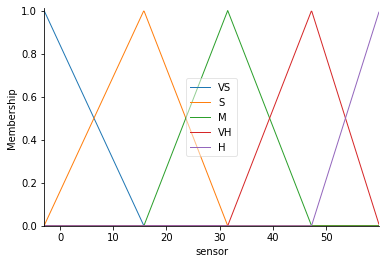

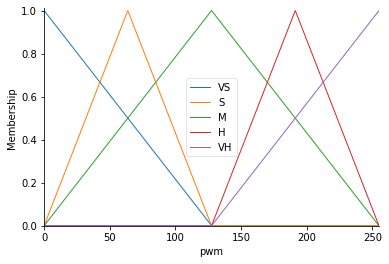

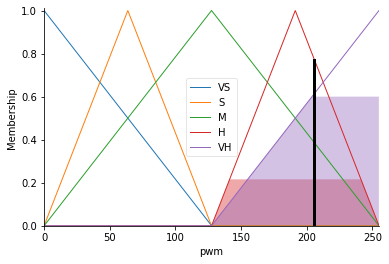

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl
setpoint=ctrl.Antecedent(np.arange(12,32,0.1),'setpoint')
sensor=ctrl.Antecedent(np.arange(-3,60,0.1),'sensor')
pwm=ctrl.Consequent(np.arange(0,255,0.1),'pwm')

setpoint['S']=fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['M']=fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['H']=fuzz.trimf(setpoint.universe,[22,32,32])

sensor['VS']=fuzz.trimf(sensor.universe,[-3,-3,15.75])
sensor['S']=fuzz.trimf(sensor.universe,[-3,15.75,31.5])
sensor['M']=fuzz.trimf(sensor.universe,[15.75,31.5,47.25])
sensor['VH']=fuzz.trimf(sensor.universe,[31.5,47.25,60])
sensor['H']=fuzz.trimf(sensor.universe,[47.25,60,60])

pwm['VS']=fuzz.trimf(pwm.universe,[0,0,127.5])
pwm['S']=fuzz.trimf(pwm.universe,[0,63.75,127.5])
pwm['M']=fuzz.trimf(pwm.universe,[0,127.5,255])
pwm['H']=fuzz.trimf(pwm.universe,[127.5,191.25,255])
pwm['VH']=fuzz.trimf(pwm.universe,[127.5,255,255])
setpoint.view()
sensor.view()
pwm.view()
#service['average'].view()
rule1=ctrl.Rule(setpoint['S']&sensor['VS'],pwm['S'])
rule2=ctrl.Rule(setpoint['S']&sensor['S'],pwm['M'])
rule3=ctrl.Rule(setpoint['S']&sensor['M'],pwm['H'])
rule4=ctrl.Rule(setpoint['S']&sensor['H'],pwm['VH'])
rule5=ctrl.Rule(setpoint['S']&sensor['VH'],pwm['VH'])

rule6=ctrl.Rule(setpoint['M']&sensor['VS'],pwm['VS'])
rule7=ctrl.Rule(setpoint['M']&sensor['S'],pwm['S'])
rule8=ctrl.Rule(setpoint['M']&sensor['M'],pwm['M'])
rule9=ctrl.Rule(setpoint['M']&sensor['H'],pwm['H'])
rule10=ctrl.Rule(setpoint['M']&sensor['VH'],pwm['VH'])

rule11=ctrl.Rule(setpoint['H']&sensor['VS'],pwm['VS'])
rule12=ctrl.Rule(setpoint['H']&sensor['S'],pwm['VS'])
rule13=ctrl.Rule(setpoint['H']&sensor['M'],pwm['S'])
rule14=ctrl.Rule(setpoint['H']&sensor['H'],pwm['M'])
rule15=ctrl.Rule(setpoint['H']&sensor['VH'],pwm['H'])

pwm_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwm_1=ctrl.ControlSystemSimulation(pwm_ctrl)
pwm_1.input['setpoint']=18
pwm_1.input['sensor']=50
pwm_1.compute()
print(pwm_1.output['pwm'])
pwm.view(sim=pwm_1)
